# Wafer map notebook
This notebook maps out wafer thickness maps from ellipsometry data. Data consists of wafer mapping carried out in LNF's Woolam ellipsometer.

## Import libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import griddata
import re

## Import and clean data

In [199]:
# Import raw data from excel file and collect sheet names
data = pd.ExcelFile('20180514_ZnO_SnO2.xlsx')
samples = data.sheet_names

# Get x and y coordinates from ellipsometry map
df = pd.read_excel(data, sheetname=samples[0])
coords = df['Position (cm)']
x = [float((re.findall(r"[-+]?\d*\.*\d+", coords[i])[0])) for i in range(5, len(coords))]
y = [float((re.findall(r"[-+]?\d*\.*\d+", coords[i])[1])) for i in range(5, len(coords))]

# Get column name with thickness
col_name = df.columns[2]

# Initialize data frame with x and y
df = pd.DataFrame({'x':x, 'y':y})

# Update data frame with thickness columns
for sample in samples:
    thickness = pd.read_excel(data, sheetname=sample)[col_name]
    df[sample] =  thickness[5:len(thickness)].reset_index(drop=True)

## Define interpolation parameters

In [200]:
# target grid for interpolation
xi = yi = np.arange(min(x)-0.1,max(x)+0.1,0.01)
xi,yi = np.meshgrid(xi,yi)


## Interpolate and plot

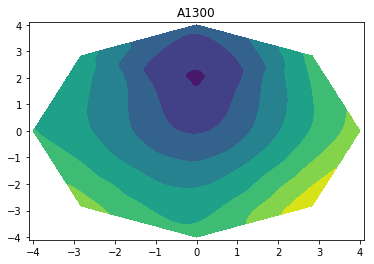

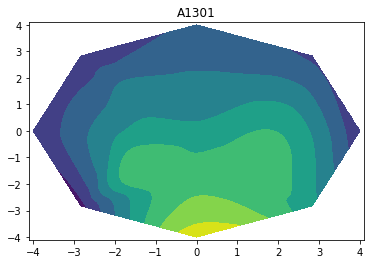

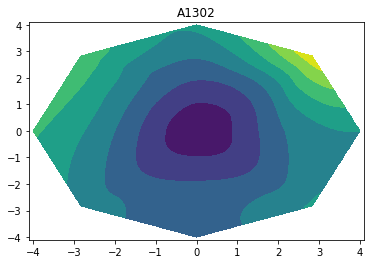

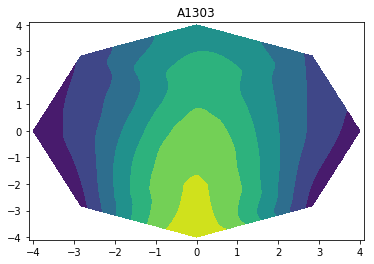

In [227]:
#fig, ax = plt.subplots(nrows=2, ncols=2)

# Interpolate using three different methods and plot
for i in range(0, len(samples)):
    zi = griddata((x, y), df[samples[i]], (xi, yi), method='cubic')
    #r, c = (i) // 2, (i) % 2
    plt.contourf(xi, yi, zi)
    plt.title(samples[i])
    plt.show()

## Plot

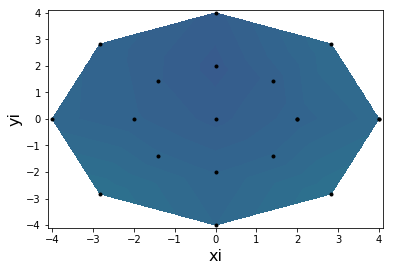

In [75]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(xi,yi,zi,vmin=m, vmax=500)
plt.plot(data.X,data.Y,'k.')
plt.xlabel('xi',fontsize=16)
plt.ylabel('yi',fontsize=16)
plt.show()
plt.savefig('interpolated.png',dpi=100)
plt.close(fig)


In [213]:
(0) // 2

0

In [217]:
1 % 2

1

In [219]:
range(0, len(samples))

range(0, 4)

In [195]:
df

,x,y,A1300,A1301,A1302,A1303
0,0.00000,0.00000,NaN,NaN,NaN,NaN
1,2.00000,-0.00000,NaN,NaN,NaN,NaN
2,1.41421,-1.41421,NaN,NaN,NaN,NaN
3,-0.00000,-2.00000,NaN,NaN,NaN,NaN
4,-1.41421,-1.41421,NaN,NaN,NaN,NaN
5,-2.00000,0.00000,131.46,562.07,-5.28,524.18
6,-1.41421,1.41421,143.90,567.55,-4.90,500.25
7,0.00000,2.00000,146.48,573.82,-4.80,512.61
8,1.41421,1.41421,143.24,574.22,-4.77,530.69
9,2.00000,0.00000,143.44,574.49,-4.80,513.51


In [198]:
df

,x,y,A1300,A1301,A1302,A1303
0,0.00000,0.00000,131.46,562.07,-5.28,524.18
1,2.00000,-0.00000,143.90,567.55,-4.90,500.25
2,1.41421,-1.41421,146.48,573.82,-4.80,512.61
3,-0.00000,-2.00000,143.24,574.22,-4.77,530.69
4,-1.41421,-1.41421,143.44,574.49,-4.80,513.51
5,-2.00000,0.00000,140.75,558.26,-4.50,496.82
6,-1.41421,1.41421,135.70,556.41,-4.53,499.62
7,0.00000,2.00000,125.71,553.22,-4.77,515.16
8,1.41421,1.41421,136.40,557.55,-4.69,505.89
9,2.00000,0.00000,143.65,567.61,-4.57,500.21
